In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

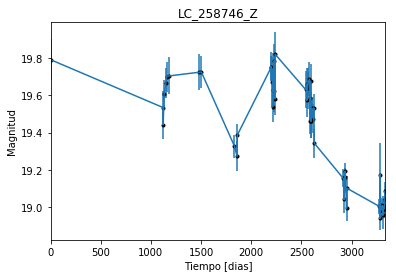

In [2]:
data = np.genfromtxt('LC_258746_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_258746_Z')
plt.savefig("LC_258746_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

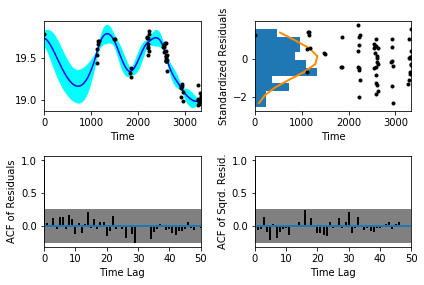

In [5]:
sample.assess_fit()

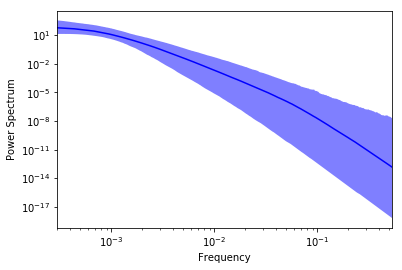

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

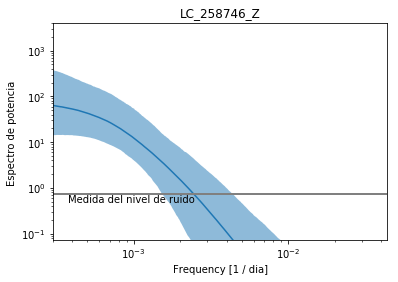

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_258746_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_258746_Z')

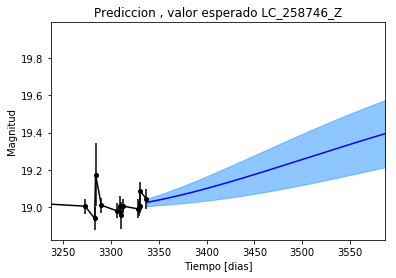

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_258746_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_258746_Z')

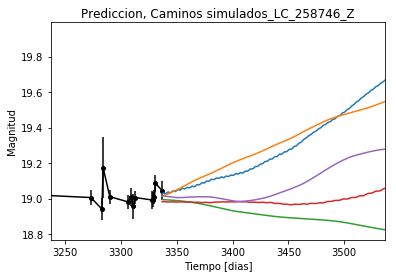

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_258746_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


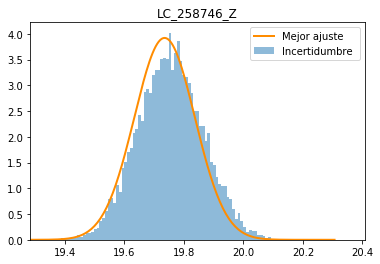

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_258746_Z')
plt.savefig("Mejor_ajuste_LC_258746_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_258746_Z')

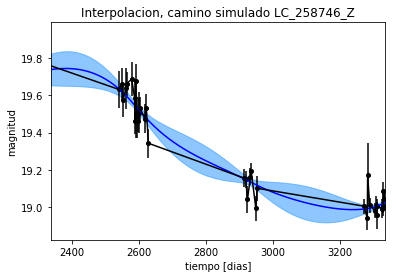

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_258746_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_258746_Z')

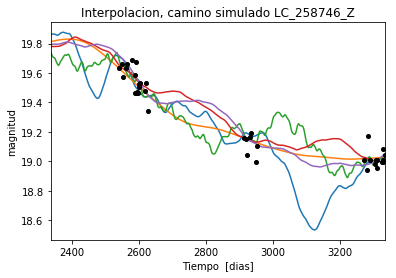

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_258746_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 521.74603403
Median: 0.00712414103151
Standard deviation: 0.201519083131
68% credibility interval: [ 0.00064216  0.19162796]
95% credibility interval: [  3.34763984e-04   7.65876370e-01]
99% credibility interval: [  3.06478586e-04   9.95621307e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 464.312927121
Median: 0.00104986571377
Standard deviation: 0.0683940435695
68% credibility interval: [ 0.0004127   0.01303404]
95% credibility interval: [ 0.00031291  0.18021374]
99% credibility interval: [  3.02735833e-04   5.54305288e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 479.014026767
Median: 0.00643652578338
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1565.16757678
Median: 86.7136049305
Standard deviation: 1.5447962516
68% credibility interval: [ 84.98462046  87.79639581]
95% credibility interval: [ 82.5489675   88.37273002]
99% credibility interval: [ 80.62811189  88.91448967]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 312.899739436
Median: 0.512342188712
Standard deviation: 2.01012052222
68% credibility interval: [ 0.03883488  3.61321958]
95% credibility interval: [ 0.01147789  6.67737303]
99% credibility interval: [ 0.00947233  8.85405589]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 626.293567545
Median: 0.160224303461
Standard deviation: 7.9994565494
68% credibility interval: [ 0.00609614  4.95212605]
95% credibility interval: [  1.34253891e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20022.8827722
Median: 5.21943169115e-24
Standard deviation: 1.149386779e+57
68% credibility interval: [  3.68981750e-75   2.97438962e-04]
95% credibility interval: [  1.37960578e-133   1.02887550e+022]
99% credibility interval: [  2.42707990e-160   4.45853003e+042]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3006.77206536
Median: 19.4667919972
Standard deviation: 0.189055917632
68% credibility interval: [ 19.32262332  19.62309351]
95% credibility interval: [ 19.1017754   19.84688041]
99% credibility interval: [ 18.86644939  20.10280459]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 417.754143551
Median: 0.000681889001525
Standard deviation: 0.233836934192
68% credibility interval: [ 0.          0.27959308]
95% credibility interval: [ 0.          0.86577099]
99% credibility interval: [ 0.          1.02981961]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 417.754143551
Median: 0.000681889001525
Standard deviation: 0.233836934192
68% credibility interval: [ 0.          0.27959308]
95% credibility interval: [ 0.          0.86577099]
99% credibility interval: [ 0.          1.02981961]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1428.10607313
Median: 0.0
Standard deviation: 0.000278686126904
68

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1565.16757678
Median: 86.7136049305
Standard deviation: 1.5447962516
68% credibility interval: [ 84.98462046  87.79639581]
95% credibility interval: [ 82.5489675   88.37273002]
99% credibility interval: [ 80.62811189  88.91448967]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1758.82011081
Median: 0.111835458487
Standard deviation: 0.14293370165
68% credibility interval: [ 0.06169775  0.23255737]
95% credibility interval: [ 0.03869645  0.53188435]
99% credibility interval: [ 0.03041118  0.91866662]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3178.2062341
Median: 0.919749316974
Standard deviation: 0.135962927777
68% credibility interval: [ 0.80419127  1.07057068]
95% credibility interval: [ 0.71013151  1.2355499 ]
99% credibility interval: [ 0.65341288  1.35781092]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1178.78412258
Median: 4.07769626251e-05
Standard deviation: 0.0142090587117
68% credibility interval: [  8.63773773e-07   1.43464404e-03]
95% credibility interval: [  4.36267212e-28   1.22720096e-02]
99% credibility interval: [  1.71038221e-47   4.08772097e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 521.74603403
Median: (-0.0447622982555-0.346919498622j)
Standard deviation: 1.93955786225
68% credibility interval: [-1.20403401+0.j         -0.00403479-4.87346338j]
95% credibility interval: [ -4.81214316e+00+0.j          -2.10338414e-03-0.00461114j]
99% credibility interval: [ -6.25567317e+00+0.j          -1.92566175e-03-0.00233888j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 464.312927121
Median: (-0.00659650082729+0.0714940377192j)
Standard deviation: 1.53079667981
68% credibility interval: [-0.08189528 +3.20550294e+00j -0.00259308 +1.14121218e-03j]
95% credibility interval: [-1.13231630+5.02215706j -0.00196606+0.j        ]
99% credibility interval: [ -3.48280284e+00+5.77122398j  -1.90214534e-03+0.13609978j]
P